<font size = 8 color ='336EFF'>Density-Based Clustering</font>
## **Equipo 4**:
| <h2>Alumno</h2> | <h2>Matricula</h2> |
| ---|---|
| <h1>**Mauricio Juárez Sánchez**</h1> | <h1>A01660336</h1> |
| <h1>**Alfredo Jeong Hyun Park**</h1> | <h1>A01658259</h1> |
| <h1>**Fernando Alfonso Arana Salas**</h1> | <h1>A01272933</h1> |
| <h1>**Miguel Ángel Bustamante Pérez**</h1> | <h1>A01781583</h1> |

### Import Relevant Libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import csv
from scipy.spatial import distance
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

### DBSCAN class



In [30]:
class DBSCAN_2:
    """
    eps: Radius of neighborhood graph
    minPts: Number of neighbors required to label a given point as a core point.
    metric: Distance metric used to determine distance between points
    """
    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric

    def fit_predict(self, X):
        """
        X: An n-dimensional array of numeric vectors to be analyzed
        Returns: [n] cluster labels
        """
        clusters = [0] * X.shape[0]
        current = 0
        for i in range(0, X.shape[0]):
            if clusters[i] is not 0:
                continue
            neighbors = neighborsGen(X, i, self.eps, self.metric)

            if len(neighbors) < self.minPts:
                clusters[i] = -1
            else:
                current += 1
                expand(X, clusters, i, neighbors, current, self.eps, self.minPts, self.metric)

        return clusters

<>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-30-de367792e8ea>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if clusters[i] is not 0:


Generates neighborhood graph for a given point

In [31]:
def neighborsGen(X, point, eps, metric):
    neighbors = []
    for i in range(X.shape[0]):
        if metric(X[point], X[i]) < eps:
            neighbors.append(i)
    return neighbors

Expands cluster from a given point until neighborhood boundaries are reached

In [32]:
def expand(X, clusters, point, neighbors, current, eps, minPts, metric):
    clusters[point] = current
    i = 0
    while i < len(neighbors):
        nextPoint = neighbors[i]

        if clusters[nextPoint] == -1:
            clusters[nextPoint] = current
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = current
            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)
            if len(nextNeighbors) >= minPts:
                neighbors = neighbors + nextNeighbors

        i += 1

Helper to illustrate accuracy of results

In [33]:
def checkEqual(l1, l2):
    return len(l1) == len(l2) and sorted(l1) == sorted(l2)

Import data

In [34]:
# your code
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Load file

In [35]:
# load your dataset
# your code
df = pd.read_csv('/content/drive/MyDrive/AI Equipo 4/Tareas/ML David/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Extract Null values

In [36]:
# checking for NULL data in the dataset and removing it
# your code
df = df.dropna()
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Extract Columns Annual Income and Spending Score

In [37]:
# extracting the above mentioned columns
# your code
df = df.drop(['CustomerID', 'Genre', 'Age'], axis=1)
#Creating an scaler for standarization
scaler = StandardScaler()
scaler.fit(df)
#Applying Scaler
X_scaled = scaler.transform(df)
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [38]:
# create scanner
# your code
dbscan2 = DBSCAN_2(eps=9.8, minPts=6)
X_scaled = np.array(df)

In [39]:
# Use Sklearn DBSCAN
# your code
#Calling sklearn function
dbscan = DBSCAN(eps=9.8, min_samples=6)

clusters = dbscan.fit_predict(X_scaled)
from sklearn.metrics import silhouette_score

# Calculating the silhouette score to identify if our model is realiable
score = silhouette_score(X_scaled, clusters)

# Printing the silhouette score
print(f'Silhouette Score:{score:.3f}')

Silhouette Score:0.434


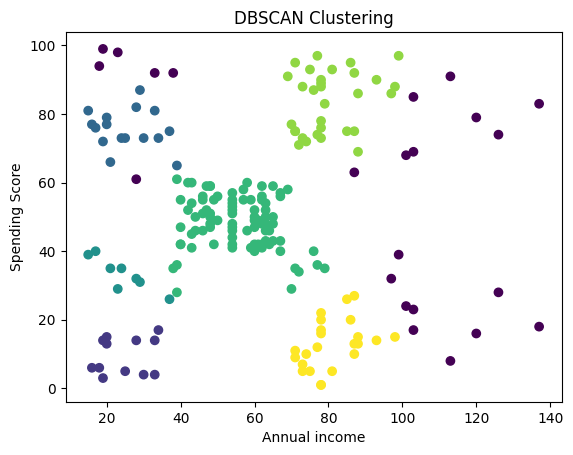

In [40]:
# Plotting the results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()